#### Dataset Description

*This Dataset comprised of around 4.5K book summaries labeled in seven genre categories: Fiction (0), Thriller (1), Childrens-Book (2), Political (3), Science-Fiction (4), War (5), and Motivational (6).*

Columns:

`summary` - Bengali book summaries. it contains -book name, author, page, price, type, publication name, publication date,  overview, rating, Bangla and English both review/comment

`genre` - Genre

`Label` - Genre Label

Importing Libraries and Download the Data

In [1]:
import numpy as np
import pandas as pd
import zipfile
import os
from collections import Counter
from wordcloud import WordCloud
import string
import re
import tensorflow as tf

In [2]:
!wget https://github.com/007williamvii/cuet_ete_competition_2023_bangla_book_review_dataset/raw/main/nlp-competition-cuet-ete-day-2023.zip

--2024-04-29 08:54:32--  https://github.com/007williamvii/cuet_ete_competition_2023_bangla_book_review_dataset/raw/main/nlp-competition-cuet-ete-day-2023.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/007williamvii/cuet_ete_competition_2023_bangla_book_review_dataset/main/nlp-competition-cuet-ete-day-2023.zip [following]
--2024-04-29 08:54:33--  https://raw.githubusercontent.com/007williamvii/cuet_ete_competition_2023_bangla_book_review_dataset/main/nlp-competition-cuet-ete-day-2023.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5755331 (5.5M) [application/zip]
Saving to: ‘nlp-competit

In [3]:
# Define the path to the downloaded ZIP file
zip_file_path = 'nlp-competition-cuet-ete-day-2023.zip'

# Define the directory to extract the contents
extract_dir = 'nlp-competition-cuet-ete-day-2023'

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents of the extracted directory
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)


Extracted files: ['train.csv', 'test.csv']


In [4]:
test_df = pd.read_csv('/content/nlp-competition-cuet-ete-day-2023/test.csv')
train_df = pd.read_csv("/content/nlp-competition-cuet-ete-day-2023/train.csv")

Exploratory Data Analysis (EDA)

In [5]:
train_df

,summary,genre,Label
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,Fiction,0
3,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,Fiction,0
4,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,Political,3
...,...,...,...
3882,"বিশ্ববিদ্যালয়ের অভ্যন্তরীণ কিছু ঘটনা, কিছু মা...",Fiction,0
3883,২০০৫ সালে সপ্তম শ্রেণীতে উঠে সাপ্তাহিক বই পড়া ...,Science-Fiction,4
3884,আবহমান গ্রাম বাংলার একটি একান্নবর্তী পরিবারের ...,Fiction,0
3885,আমার মত যারা ৯০'র দশকে জন্ম তারা আমরা অনেকেই ১...,Political,3


In [6]:
test_df

,Id,summary
0,0,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...
1,1,বইঃ দ্য সান অফ লাইট (রামেসিস #1) লেখকঃ ক্রিশ্চ...
2,2,বাংলাদেশ আমার জন্মভূমি। সাতপুরুষের ভিটে-মাটি। ...
3,3,বিংশ শতাব্দীর বাঙালি জনপ্রিয় কথাসাহিত্যিকদের ...
4,4,অনেক সুন্দর এবং অসাধারণ একটি বই.... মধ্যবিত্ত...
...,...,...
682,682,বইটির কাহিনী আবর্তিত হয়েছে যুক্তরাষ্ট্রের দুই ...
683,683,"ফরাসি বিপ্লব মানে বুর্জোয়া বিপ্লব, আদি সমাজতা..."
684,684,শুভ্র চরিত্রটি আমরা প্রথম দেখতে পাই ‘দারুচিনি...
685,685,রকমারি_রিভিউ_প্রতিযোগিতা_জুন\r\n\r\nপালোমিনো ম...


In [7]:
train_df.shape # with duplicated values

(3887, 3)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887 entries, 0 to 3886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  3886 non-null   object
 1   genre    3887 non-null   object
 2   Label    3887 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 91.2+ KB


In [9]:
train_df.describe()

,Label
count,3887.000000
mean,1.882171
std,1.892371
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,6.000000


In [10]:
train_df.columns

Index(['summary', 'genre', 'Label'], dtype='object')

Data Wrangling

In [11]:
missing_values_count = train_df.isnull().sum()
missing_values_count

summary    1
genre      0
Label      0
dtype: int64

In [12]:
# how many total missing values does it have?
total_cells = np.product(train_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.008575593859874798


In [13]:
#drop the nullvalues
train_df.dropna(inplace=True)

In [14]:
train_df

,summary,genre,Label
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,Fiction,0
3,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,Fiction,0
4,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,Political,3
...,...,...,...
3882,"বিশ্ববিদ্যালয়ের অভ্যন্তরীণ কিছু ঘটনা, কিছু মা...",Fiction,0
3883,২০০৫ সালে সপ্তম শ্রেণীতে উঠে সাপ্তাহিক বই পড়া ...,Science-Fiction,4
3884,আবহমান গ্রাম বাংলার একটি একান্নবর্তী পরিবারের ...,Fiction,0
3885,আমার মত যারা ৯০'র দশকে জন্ম তারা আমরা অনেকেই ১...,Political,3


In [15]:
# identify duplicated values
train_df[train_df.duplicated()]

,summary,genre,Label
146,মাঝে মাঝেই বইটা স্টক আউট হয়ে যায়। প্রকাশনী থেক...,Political,3
286,বইয়ের নামঃ থ্রিঃফর্টিসিক্স এএম (3:46 AM) লেখকঃ...,Thriller,1
345,‘মোসাদ’ বইটি পৃথিবীর অন্যতম একটি অসাধারন তথ্যম...,Political,3
415,"বর্তমান প্রজন্মের জনপ্রিয়, পাঠকনন্দিত, সম্ভাবন...",Science-Fiction,4
483,#রকমারি_বইপোকা_রিভিউ_প্রতিযোগিতা\r\n\r\nবইয়ের...,Fiction,0
...,...,...,...
3847,আমি কখনওই অপরিচিত লেখক-লেখিকাদের বই পড়ি না। কি...,Fiction,0
3854,"একজন ভালো মানুষ, একজন ভালো নেতা, সর্বোপরি একজন...",Political,3
3859,এই অনুবাদ পড়ার ধৈর্য আমার হয়নি বহু চেষ্টা করেও...,Political,3
3869,"""লোকায়ত জীবনবোধ ছাপিয়ে অস্তিত্ববাদের গল্প : কা...",Fiction,0


In [16]:
train_df.drop_duplicates(keep='first',inplace=True)

In [17]:
train_df.shape # without duplicate values

(3578, 3)

In [18]:
train_df.dtypes

summary    object
genre      object
Label       int64
dtype: object

In [19]:
# Check Value Counts in Each Genre
train_df.genre.value_counts()

genre
Fiction            1193
Thriller            615
Childrens-Book      488
Political           401
Science-Fiction     391
War                 297
Motivational        193
Name: count, dtype: int64

In [20]:
train_df.summary[0]

'#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ্যাডভেঞ্চার\r\nলেখকঃ বিভূতিভূষন বন্দ্যোপাধ্যায়\r\nপৃষ্ঠা সংখ্যাঃ ৭৯\r\nপ্রকাশকঃ জয় প্রকাশন\r\n\r\nভারত বাংলার এক নিভৃত পল্লী গাঁয়ের সহজ সরল প্রাণোচ্ছ্বল ছেলে সঙ্কর । \r\nএফ.এ পাশ করা গাঁয়ের ফুটবলের নামকরা সেন্ট্রাল ফরোয়ার্ড, নামজাদা সাঁতারু  সঙ্করের দিনগুলো কাটছিল বন্ধুদের সাথে আড্ডা দিয়ে, ঘুমিয়ে আর বাঁওড়ে মাছ ধরে । এমন সময় সঙ্করের মা একদিন তাকে বলেন যে, তার বাবার শরীর ভালো নয় কাজেই সঙ্করকে একটা চাকরীর চেষ্টা করতে হবে । মায়ের কথাটা সঙ্করেকে ভাবিয়ে তুলেছে । কে তাকে চাকরি দেবে ? সে চেনেই বা কাকে ?\r\nসঙ্করদের গ্রামের এক ভদ্রলোক পাটকলে চাকরি করতেন তার বিশেষ সুপারিশে সঙ্কর পাটকলের কেরানির পদে চাকরি পায় কিন্তু সঙ্করের মন উড়ে যেতে চায় পৃথিবীর দূর, দূর দেশে শত শত দুঃসাহসিক কাজের মাঝখানে । লিভিংস্টোন, স্ট্যানলির মতো, হ্যারি, জনস্টন মার্কো পোলো, রবিনসন ক্রুসোর মতো । আসলে বাঙালী যে সৃষ্টিই হয়েছে কেরানী, স্কুলমাষ্টার, ডাক্তার বা উকিল হবার জন্য । অজ্ঞাত অঞ্চলের অজানা পথে পাড়ি দেওয়ার আশা তাদের পক্ষে নিতান্তই দুরাশা । কাজেই সঙ্কর নিজের

In [21]:
train_df.summary.sample(15).values

array(['অভিশাপ পরে আমি এক  কথায় আউলা হয়ে গেছি। বইটি পড়ার পর দুই দিন আমি ঠিক মতো ঘুমাতে পারিনি। ঘোরের মধ্যে কেটেছে পুরোটা সময়। মালার জীবন টা এতো কষ্টের কেন এ প্রশ্নই বার বার মনে হয়েছে। একটানে শেষ করা আমার জীবনে প্রথম বই এটি।',
       'ঋভু।\r\nনামটাই রোমাঞ্চকর। \r\nপাঠক হিসেবে আমি ইতিহাস প্রিয় পাঠক, এর সাথে ঋভু টানটান উত্তেজনা পূর্ণ এডভেঞ্চার। এক কথায় অসাধারণ। সেই কবে সেবা প্রকাশনীর থ্রিলার পড়েছিলাম...। ঋভু পড়ে আবার সে নেশাটা জেগে উঠল। \r\nঋভু ... বইটি আসলেই সময় এবং আগ্রহ কে পুরোপুরি উসুল করল। \r\nঅনেক অনেক ধন্যবাদ শরীফুল হাসান ভাই।',
       'তৌহিদুল ইকবাজ সম্পদ এর শখের গোয়েন্দা মারুফকে নিয়ে রচিত “মারুফ ও দের ব্যাটারি” উপন্যাসটি একটি অ্যাডভেঞ্চার ও রহস্য ভরপুর কিশোর উপন্যাস।এই উপন্যাসটিতে লেখক তৌহিদুল ইকবাল সম্পদ বেশ ভালই কাহিনীটি সাজিয়েছেন।মারুফ একজন শখের গোয়েন্দা যিনি লেখাপড়া শেষ করে ভাল চাকরি করেও মনে শান্তি পান না কারন তার চারপাশে ঘটে যাওয়া অনেক অপরাধ গুলো তিনি সহ্য করতে পারেন না।তাই তিনি নিজেই “শ্যেনচক্ষু” নামে প্রাইভেট ডিটেক্টিভ ফার্ম গড়ে তুলেন।তার সাথে যুক্ত হন সাংবাদিক রোমান যিনি

Data Visualization

Dataset Distribution

Total number of summary: 3578


<ipython-input-22-7078b5c6b851>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.countplot(y='genre', data=train_df, palette=custom_palette)
<ipython-input-22-7078b5c6b851>:18: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  bar_plot = sns.countplot(y='genre', data=train_df, palette=custom_palette)


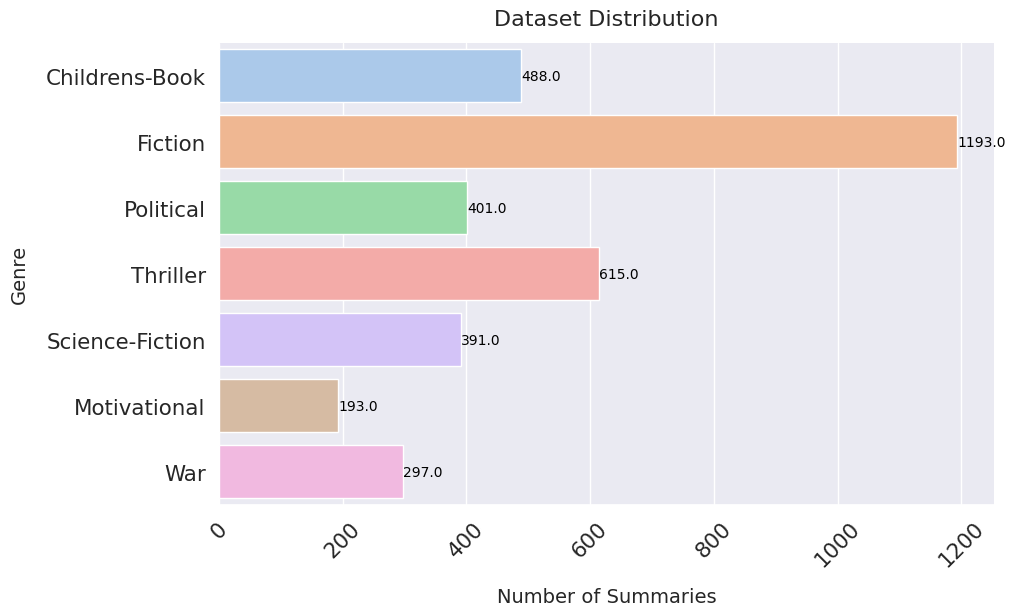

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
print(f'Total number of summary: {len(train_df)}')

# Set a custom color palette
custom_palette = sns.color_palette("pastel")

# Set the background style
sns.set_style("whitegrid")

# Set font scale
sns.set(font_scale=1.4)

# Create the plot
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(y='genre', data=train_df, palette=custom_palette)

# Add labels and title with increased font size
plt.xlabel("Number of Summaries", labelpad=12, fontsize=14)
plt.ylabel("Genre", labelpad=12, fontsize=14)
plt.title("Dataset Distribution", y=1.02, fontsize=16)

# Rotate y-axis labels for better readability
plt.xticks(rotation=45)

# Add value annotations on the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width()}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2),
                      ha='left', va='center', fontsize=10, color='black')

# Remove the top and right spines for aesthetics
sns.despine()

# Show the plot
plt.show()

Most Frequent Words

In [23]:
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf

--2024-04-29 08:56:12--  https://www.omicronlab.com/download/fonts/kalpurush.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 104.21.12.234, 172.67.153.233, 2606:4700:3030::6815:cea, ...
Connecting to www.omicronlab.com (www.omicronlab.com)|104.21.12.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314592 (307K) [application/octet-stream]
Saving to: ‘kalpurush.ttf’

kalpurush.ttf       100%[===================>] 307.22K   759KB/s    in 0.4s    

2024-04-29 08:56:14 (759 KB/s) - ‘kalpurush.ttf’ saved [314592/314592]



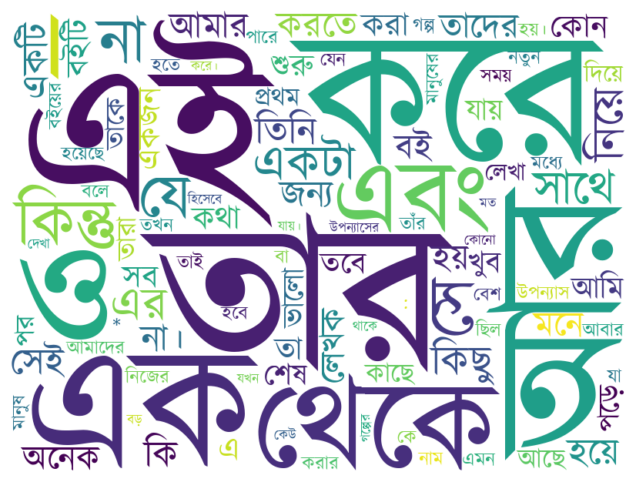

In [24]:
text_column = train_df['summary']
all_text = ' '.join(text_column.dropna())
words = all_text.split()
word_counts = Counter(words)
top_100_words = word_counts.most_common(100)
top_100_dict = dict(top_100_words)

font_path = '/content/kalpurush.ttf'

wordcloud = WordCloud(width=800,
                      height=600,
                      background_color='white',
                      font_path=font_path).generate_from_frequencies(top_100_dict)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Presence of English Data


In [25]:
# Regular expression for Bangla characters (Unicode range for Bengali script)
bangla_pattern = re.compile(r'[\u0980-\u09FF]+')

# Check for rows with only English characters (absence of Bangla characters)
english_rows = train_df[~train_df['summary'].str.contains(bangla_pattern, na=False, regex=True)]

num_english_rows = len(english_rows)
print("Number of rows only containing English characters in 'Summary' column:", num_english_rows)
english_rows

Number of rows only containing English characters in 'Summary' column: 165


,summary,genre,Label
24,good really,Fiction,0
37,it is very good,Fiction,0
38,When this book will available in your stock,Political,3
41,this book is anisul haque's first novel and in...,Fiction,0
62,my book,Political,3
...,...,...,...
3782,:),Fiction,0
3784,It is a Great Book of that time Political Parties,Political,3
3804,Khub bhalo boi .............,Fiction,0
3817,A brief journey into Pakistan period...,Political,3


In [26]:
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.1 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=d6d88d50489fac0b64ab4a4dfcb421bd12166fd56d8ad6dd081b79517791a1df
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


Data Preprocessing

In [27]:
from bnlp import NLTKTokenizer
tokenizer = NLTKTokenizer()

# Tokenize the 'summary' column
train_df['summary'] = train_df['summary'].apply(lambda x: tokenizer.word_tokenize(str(x)) if pd.notna(x) else x)
test_df['summary'] = test_df['summary'].apply(lambda x: tokenizer.word_tokenize(str(x)) if pd.notna(x) else x)

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [28]:
from bnlp import CleanText

cleaner = CleanText(
    fix_unicode=True,
    unicode_norm=True,
    unicode_norm_form="NFKC",
    remove_url=False,
    remove_email=False,
    remove_emoji=False,
    remove_number=False,
    remove_digits=False,
    remove_punct=False,
    replace_with_url="<URL>",
    replace_with_email="<EMAIL>",
    replace_with_number="<NUMBER>",
    replace_with_digit="<DIGIT>",
    replace_with_punct="<PUNC>"
)

# Apply the cleaning function to the 'summary' column
train_df['summary'] = train_df['summary'].apply(cleaner)
test_df['summary'] = test_df['summary'].apply(cleaner)
train_df.summary

0       ['#', 'BookReview', 'বইঃ', 'চাঁদের', 'পাহাড়',...
1       ['বেশির', 'ভাগ', 'বই', 'ই', 'আমার', 'ভাললাগে',...
2       ['মিসির', 'আলি', 'এখন', 'তার', 'ছাত্র', 'ফারুক...
3       ['ছোটজাতের', 'ছোটজাত', 'হাসিম', '।', 'পিতৃপ্রদ...
4       ['ফালতু', 'একটা', 'বই', '।', 'পয়সা', 'নষ্ট', ...
                              ...                        
3882    ['বিশ্ববিদ্যালয়ের', 'অভ্যন্তরীণ', 'কিছু', 'ঘট...
3883    ['২০০৫', 'সালে', 'সপ্তম', 'শ্রেণীতে', 'উঠে', '...
3884    ['আবহমান', 'গ্রাম', 'বাংলার', 'একটি', 'একান্নব...
3885    ['আমার', 'মত', 'যারা', '৯০', "'", 'র', 'দশকে',...
3886    ['স্বাধীন', 'বাংলাদেশের', 'প্রথম', 'বিরোধী', '...
Name: summary, Length: 3578, dtype: object

In [29]:
def remove_unicode_character(text, character):
    if pd.isna(text):
        return text
    return text.replace(character, '')

def remove_emojis(text):
    if pd.isna(text):
        return text
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F700-\U0001F77F"
                               u"\U0001F780-\U0001F7FF"
                               u"\U0001F800-\U0001F8FF"
                               u"\U0001F900-\U0001F9FF"
                               u"\U0001FA00-\U0001FA6F"
                               u"\U0001FA70-\U0001FAFF"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_carriage_return_newline(text):
    if pd.isna(text):
        return text
    return text.replace('\r\n', ' ')
def remove_punctuation(text):
    # Check if the value is NaN
    if pd.isna(text):
        return text

    # Use string.punctuation to get the list of all punctuation characters
    translator = str.maketrans('', '', string.punctuation)

    # Use translate to remove the punctuation characters
    return text.translate(translator)

# Example of usage:
unicode_character = '।'
train_df['summary'] = train_df['summary'].apply(remove_unicode_character, character=unicode_character)
train_df['summary'] = train_df['summary'].apply(remove_emojis)
train_df['summary'] = train_df['summary'].apply(remove_carriage_return_newline)
train_df['summary'] = train_df['summary'].apply(remove_punctuation)
train_df['summary'] = train_df['summary'].str.replace('BookReview', '')
test_df['summary'] = test_df['summary'].apply(remove_unicode_character, character=unicode_character)
test_df['summary'] = test_df['summary'].apply(remove_emojis)
test_df['summary'] = test_df['summary'].apply(remove_carriage_return_newline)
test_df['summary'] = test_df['summary'].apply(remove_punctuation)
test_df['summary'] = test_df['summary'].str.replace('BookReview', '')

In [30]:
!wget https://github.com/stopwords-iso/stopwords-bn/blob/master/stopwords-bn.txt

--2024-04-29 08:57:15--  https://github.com/stopwords-iso/stopwords-bn/blob/master/stopwords-bn.txt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘stopwords-bn.txt’

stopwords-bn.txt        [ <=>                ] 149.25K  --.-KB/s    in 0.1s    

2024-04-29 08:57:15 (1.10 MB/s) - ‘stopwords-bn.txt’ saved [152836]



In [31]:
words_to_remove ='/content/stopwords-bn.txt' # stopwords list

# Function to remove specified words
def remove_words(text):
    words = text.split()
    words = [word for word in words if word not in words_to_remove]
    return ' '.join(words)

# Apply the remove_words function to the 'summary' column
train_df['summary'] = train_df['summary'].apply(remove_words)
test_df['summary'] = test_df['summary'].apply(remove_words)

In [32]:
train_df['summary'] = train_df['summary'].apply(remove_punctuation)
test_df['summary'] = test_df['summary'].apply(remove_punctuation)

In [33]:
def data_summary(df):

    """
    This function will print the summary of the headlines and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(df.summary) for word in t.strip().split()]
    class_label= [k for k,v in df.genre.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(df[df.genre==label].summary) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(df[df.genre==label].summary)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(df[df.genre==label].summary))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:20]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion

documents,words,u_words,class_names = data_summary(train_df)


Class Name :  Fiction
Number of Documents:1193
Number of Words:351483
Number of Unique Words:41053
Most Frequent Words:

তার	3985
এই	3556
না	3460
করে	3379
আর	2525
এক	2204
হয়	2126
সে	2109
কিন্তু	1783
যে	1672
থেকে	1656
যায়	1600
সাথে	1577
নিয়ে	1542
একটা	1502
ও	1410
হয়ে	1399
কি	1312
লেখক	1284
এবং	1281

Class Name :  Thriller
Number of Documents:615
Number of Words:237454
Number of Unique Words:27898
Most Frequent Words:

এই	2329
তার	2248
এক	1977
আর	1967
করে	1924
না	1782
কিন্তু	1322
হয়	1264
থেকে	1259
একটা	1176
সাথে	1170
সে	1157
যায়	1070
ও	1045
এবং	1028
কি	1013
যে	991
হয়ে	979
কিছু	976
নিয়ে	975

Class Name :  Childrens-Book
Number of Documents:488
Number of Words:144628
Number of Unique Words:16605
Most Frequent Words:

তার	1928
করে	1621
না	1430
এই	1381
আর	1263
সে	1026
হয়	1005
এক	895
একটা	836
কিন্তু	807
থেকে	792
সাথে	738
যায়	728
যে	695
নিয়ে	677
হয়ে	675
এবং	583
বই	580
ও	566
কিশোর	562

Class Name :  Political
Number of Documents:401
Number of Words:88276
Number of Unique Words:1656

In [34]:
train_df.summary[0]

'বইঃ চাঁদের পাহাড় ধরনঃ অ্যাডভেঞ্চার লেখকঃ বিভূতিভূষন বন্দ্যোপাধ্যায় পৃষ্ঠা সংখ্যাঃ ৭৯ প্রকাশকঃ জয় প্রকাশন ভারত বাংলার এক নিভৃত পল্লী গাঁয়ের সহজ সরল প্রাণোচ্ছ্বল ছেলে সঙ্কর এফএ পাশ করা গাঁয়ের ফুটবলের নামকরা সেন্ট্রাল ফরোয়ার্ড নামজাদা সাঁতারু সঙ্করের দিনগুলো কাটছিল বন্ধুদের সাথে আড্ডা দিয়ে ঘুমিয়ে আর বাঁওড়ে মাছ ধরে এমন সময় সঙ্করের মা একদিন তাকে বলেন যে তার বাবার শরীর ভালো নয় কাজেই সঙ্করকে একটা চাকরীর চেষ্টা করতে হবে মায়ের কথাটা সঙ্করেকে ভাবিয়ে তুলেছে কে তাকে চাকরি দেবে সে চেনেই বা কাকে সঙ্করদের গ্রামের এক ভদ্রলোক পাটকলে চাকরি করতেন তার বিশেষ সুপারিশে সঙ্কর পাটকলের কেরানির পদে চাকরি পায় কিন্তু সঙ্করের মন উড়ে যেতে চায় পৃথিবীর দূর দূর দেশে শত শত দুঃসাহসিক কাজের মাঝখানে লিভিংস্টোন স্ট্যানলির মতো হ্যারি জনস্টন মার্কো পোলো রবিনসন ক্রুসোর মতো আসলে বাঙালী যে সৃষ্টিই হয়েছে কেরানী স্কুলমাষ্টার ডাক্তার বা উকিল হবার জন্য অজ্ঞাত অঞ্চলের অজানা পথে পাড়ি দেওয়ার আশা তাদের পক্ষে নিতান্তই দুরাশা কাজেই সঙ্কর নিজের নিয়তিকে মেনেই নিয়েছিল পাটকলের কেরানি হিসেবে তারপর দৈববলে একদিন সঙ্কর তার স

In [35]:
train_df.summary.sample(15).values

array(['জাফর ইকবাল স্যারের লেখা এক অমর মুক্তিযুদ্ধভিত্তিক অসাধারণ কিশোর উপন্যাস মুক্তিযুদ্ধ নিয়ে বহু সংখ্যক গ্রন্থ বহুবার রচিত হয়েছে কিন্তু যুদ্ধে শিশু কিশোরদের নির্ভয় অংশগ্রহণের ব্যাপারটি খুব কম গ্রন্থেই লেখা আছে মুক্তিযুদ্ধে শিশু কিশোরদের অংশগ্রহণ এবং তাদের অবদান স্বতন্ত্র উপন্যাস দিয়ে সবার সামনে ছবির মত তুলে ধরেছেন ড মুহম্মদ জাফর ইকবাল স্যার ১৯৭১ সালে আমাদের দেশের কিশোররা মুক্তিযুদ্ধে যে গুরুত্বপূর্ণ ভূমিকা রেখেছে তা এখানে তুলে ধরা হয়েছে দেশকে পাকিস্তানিদের হাত থেকে মুক্ত করার জন্য তারাও মুক্তিযুদ্ধে অংশগ্রহন করে লুকিয়ে লুকিয়ে মুক্তিবাহিনীকে অস্ত্র সরবরাহ করে পাকিস্তানি ঘাঁটিকে উচ্ছেদ করার জন্য ম্যাপ একে দেয় বয়সে ছোট হবার কারনে হানাদার বাহিনী তাদেরকে সন্দেহ করে না কিন্তু একসময় তা প্রকাশ পেয়ে যায় মুক্তিযুদ্ধ প্রচণ্ড আকার ধারন করলে সবাই পালিয়ে যায় কিন্তু রাশেদ থেকে যায় এক সময় রাজাকারদের হাতে সে মারা যায় রাশেদ ১৯৭১সালে তত্কালীন পূর্ব পাকিস্তানের এক দুরন্ত নির্ভীক কিশোর চরিত্র তার বাবা কিছুটা পাগল গোছের মানুষ তাই ছেলের পড়াশুনার কোন খবর রাখেন না এমনকি ছেলের ভাল একটা নাম

In [36]:
# !pip install tensorflow-text

In [37]:
# !pip install ktrain==0.39.0

In [38]:
train_df.head()

,summary,genre,Label
0,বইঃ চাঁদের পাহাড় ধরনঃ অ্যাডভেঞ্চার লেখকঃ বিভূ...,Childrens-Book,2
1,বেশির ভাগ বই ই আমার ভাললাগে কিন্তু এই টাইপের ব...,Fiction,0
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি ক...,Fiction,0
3,ছোটজাতের ছোটজাত হাসিম পিতৃপ্রদত্ত নামখানা একরক...,Fiction,0
4,ফালতু একটা বই পয়সা নষ্ট বাজে লেখনী একই জিনিস ...,Political,3


In [39]:
train_df.to_csv('/content/clean_df.csv', index=False)

In [40]:
df_0 = train_df[train_df["Label"]==0]
df_0.shape

(1193, 3)

In [41]:
df_1 = train_df[train_df["Label"]==1]
df_1.shape

(615, 3)

In [42]:
df_2 = train_df[train_df["Label"]==2]
df_2.shape

(488, 3)

In [43]:
df_3 = train_df[train_df["Label"]==3]
df_3.shape

(401, 3)

In [44]:
df_4 = train_df[train_df["Label"]==4]
df_4.shape

(391, 3)

In [45]:
df_5 = train_df[train_df["Label"]==5]
df_5.shape

(297, 3)

In [46]:
df_6 = train_df[train_df["Label"]==6]
df_6.shape

(193, 3)

In [47]:
df_0_downsampled = df_0.sample(df_6.shape[0])
df_0_downsampled.shape

(193, 3)

In [48]:
df_1_downsampled = df_0.sample(df_6.shape[0])
df_1_downsampled.shape

(193, 3)

In [49]:
df_2_downsampled = df_0.sample(df_6.shape[0])
df_2_downsampled.shape

(193, 3)

In [50]:
df_3_downsampled = df_0.sample(df_6.shape[0])
df_3_downsampled.shape

(193, 3)

In [51]:
df_4_downsampled = df_0.sample(df_6.shape[0])
df_4_downsampled.shape

(193, 3)

In [52]:
df_5_downsampled = df_0.sample(df_6.shape[0])
df_5_downsampled.shape

(193, 3)

In [53]:
df_balanced = pd.concat([df_0_downsampled,df_1_downsampled,df_2_downsampled,df_3_downsampled,df_4_downsampled,df_5_downsampled,df_6])
df_balanced.shape

(1351, 3)

In [54]:
!pip install tf_keras

In [55]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

learning_rate = 1e-4
epochs = 10

In [56]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 46.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 43.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.3-py3-none-any.whl size=25316960 sha256=ae7c33c2e0153890c69cd3f5afd64b54d9ad12358118c158b397502393e5e74c
  Stored in directory: /root/.cache/pip/wheels/fc/76/11/5b953090eebf531f660948a30cd26e70260619f6480f186a5a
  Created wheel for keras_bert: filename=

In [57]:
import ktrain
from ktrain import text as texts

Model Selection

In [58]:
transformer1 = texts.Transformer('csebuetnlp/banglabert', maxlen=200)

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Train -Test Split

In [59]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_balanced['summary'],df_balanced["Label"],stratify=df_balanced['Label'],random_state=42,test_size=0.15)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(train_df['summary'],train_df["Label"],stratify=train_df['Label'],random_state=42,test_size=0.15)

In [61]:
X_train = list(X_train)
X_test = list(X_test)

y_train = [str(x) for x in y_train]
y_test = [str(x) for x in y_test]

trn_data = transformer1.preprocess_train(X_train, y_train)
val_data = transformer1.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 310
	95percentile : 718
	99percentile : 1174


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 312
	95percentile : 737
	99percentile : 1314


In [ ]:
learning_rate = 1e-4
epochs = 10

model3 = transformer1.get_classifier()

model_learner3 = ktrain.get_learner(model3, train_data=trn_data, val_data=val_data, batch_size=16)

model_learner3.fit_onecycle(learning_rate, epochs)

In [ ]:
model_learner3.model.summary()

Model Evaluation - Classification Report

In [ ]:
model_learner3.validate(class_names=transformer1.get_classes())

In [ ]:
df_test = pd.read_csv("/content/nlp-competition-cuet-ete-day-2023/test.csv",encoding='utf8',index_col="Id")
df_test.head()

In [ ]:
X_test = list(df_test['summary'].values)

In [ ]:
predictor3 = ktrain.get_predictor(model_learner3.model, preproc=transformer1)


In [ ]:
df_test_predict = predictor3.predict(X_test) # model3


In [ ]:
df_test["Label"]  = df_test_predict
df_test.head()

In [ ]:
df_final = df_test.drop(["summary"],axis=1)

In [ ]:
df_final.head(100)